# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name:

ID:

Team Mate name :

ID:

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is required for this assignment. Still you need to comment your code. (-10 for no comments in the code.)
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 2 files(clustering.csv and college.csv).<br>
Output variable for clustering.csv - Class (<=50K and >50K)<br>
Output variable for college.csv - Grad.Rate (<=50 and >50k)<br>

You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [2]:
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only
-20 points for the use of libraries other than the above mentioned

In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 

import sklearn

from sklearn import cluster
from sklearn import linear_model
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


Load our data

In [4]:
clustering_df = pd.read_csv('clusteringdata.csv')
college_df = pd.read_csv('College.csv')

In [5]:
clustering_df.head()

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
college_df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [7]:
clustering_df.columns

Index(['Age', 'WorkClass', 'Fnlwght', 'Education', 'EducationNumber',
       'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Sex',
       'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry', 'Class'],
      dtype='object')

In [8]:
#########################begin code for Task 1-a
#########################begin code for Task 1-a
num_features = ['Age','Fnlwght','EducationNumber','CapitalGain','CapitalLoss','HoursPerWeek']
cat_features = ['WorkClass','Education','MaritalStatus','Occupation','Relationship','Race','Sex','NativeCountry','Class']


We have lots of categorical data. So we have to make them numerical by encoding them.This will replace the values of the categorical columns and indicate the absence or presence of categorical values in the data using binary 0 or 1. 

In [9]:
clustering_df1 = clustering_df.copy()


for col in cat_features:
    dummies = pd.get_dummies(clustering_df1[col], prefix=col)
    clustering_df1 = pd.concat([clustering_df1, dummies], axis=1)
    clustering_df1.drop(col, axis=1, inplace=True)
    

In [10]:
clustering_df1.head()

,Age,Fnlwght,EducationNumber,CapitalGain,CapitalLoss,HoursPerWeek,WorkClass_ ?,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Private,...,NativeCountry_ Scotland,NativeCountry_ South,NativeCountry_ Taiwan,NativeCountry_ Thailand,NativeCountry_ Trinadad&Tobago,NativeCountry_ United-States,NativeCountry_ Vietnam,NativeCountry_ Yugoslavia,Class_ <=50K,Class_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [13]:

from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

target = clustering_df['Class']
clustering_df2 = clustering_df.drop(columns=['Class'])

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(clustering_df2)
categorical_columns = categorical_columns_selector(clustering_df2)

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)
preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")




preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [15]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline

# model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
# # _ = model.fit(X_train, y_train)

In [16]:
sse_distances = []

r = range(1,10)

for k in r:
    km = KMeans(n_clusters=k)
    km = km.fit(clustering_df1)
    sse_distances.append(km.inertia_)

sse_distances

[56799988559458.97,
 22615103728626.414,
 11909925038744.69,
 7629928534020.832,
 5416208024896.335,
 3732210324935.617,
 2847377804233.2344,
 2259708304120.793,
 1877608820937.4746]

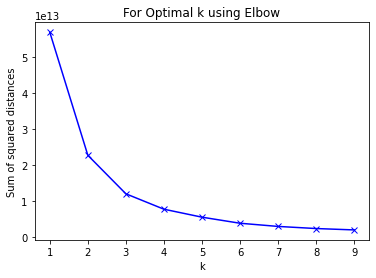

In [17]:
plt.plot(r, sse_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('For Optimal k using Elbow')
plt.show()

From the plot, the k optimal cluster is *3*

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [18]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
random_state = 2022
### Important!!!

###################end code for Task 1-b-1
from sklearn.model_selection import train_test_split






In [19]:
#split data again
train, test = train_test_split(clustering_df1, test_size=0.3,random_state=random_state)

In [20]:
# data shap
print (train.shape, test.shape)


(3500, 107) (1500, 107)


In [21]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
km_model = KMeans(n_clusters=2)

#Compute cluster centers and predict cluster index for each sample 
#model
km_model_fit= km_model.fit(train) 

#cluster centers
centers = km_model_fit.cluster_centers_

# Model and fit the data to the PCA model
pca = PCA()


X_train_pca = pca.fit_transform(train)

X_train_pca

array([[-9.50493453e+04, -1.07815494e+03, -9.49837054e+01, ...,
        -1.78684389e-10,  4.41442532e-12,  6.36292148e-15],
       [ 3.07316536e+04, -1.09595885e+03, -9.59744732e+01, ...,
         4.78937625e-12,  4.34521563e-12,  4.03550734e-16],
       [ 1.82526536e+04, -1.09419281e+03, -9.58957755e+01, ...,
         2.64706537e-11, -8.86461317e-13,  1.40624096e-13],
       ...,
       [ 2.38342652e+05, -1.12534673e+03, -9.76611552e+01, ...,
         1.06324933e-12,  2.16814188e-13,  6.38582295e-16],
       [-2.38883459e+04, -1.08823276e+03, -9.56631584e+01, ...,
         3.24533226e-12,  6.31184247e-13,  1.09572255e-15],
       [ 8.04546529e+04, -1.10299384e+03, -9.63193721e+01, ...,
        -4.86778645e-12,  7.30921887e-13,  3.16041859e-16]])

In [22]:
km_model_fit

KMeans(n_clusters=2)

In [23]:
preds = km_model_fit.predict(X_train_pca)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


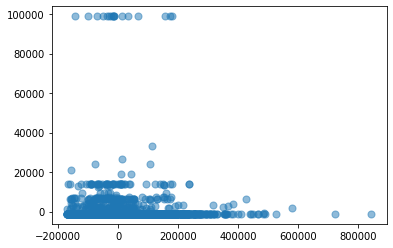

In [24]:

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)




x = X_train_pca[:, 0]
y = X_train_pca[:, 1]



plt.scatter(x,y,  s=50, alpha=0.5,cmap='viridis')


###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

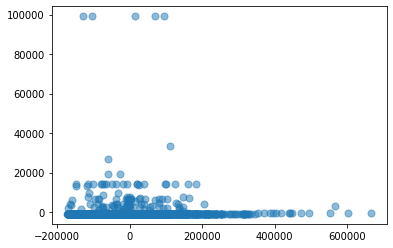

In [25]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels

km_model_fit_t= km_model.fit(test) 

#cluster centers
centers = km_model_fit_t.cluster_centers_

# predict cluster index for each sample 
index =km_model_fit_t.cluster_centers_.shape

# Model and fit the data to the PCA model

X_test_pca = pca.fit_transform(test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

plt.scatter(x,y,  s=50, alpha=0.5,cmap='viridis');


###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [26]:
###################begin code for Task 1-b-4: Print out a confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
preds = km_model_fit.predict(test)

# It is not possible to obtain a confusion matrix from a clustering model such as kmeans.

###################end code for Task 1-b-4

# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [29]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cluster1 = AgglomerativeClustering(n_clusters = 2,affinity='cosine', linkage='complete').fit(pdm_train)
cluster1_fit = cluster1.fit_predict(train)
f1_score_1 = f1_score(preds, cluster1_fit)
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
cluster2 = AgglomerativeClustering(n_clusters = 2,affinity='euclidean', linkage='complete').fit(pdm_train)
cluster2_fit = cluster2.fit_predict(train)
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
cluster3 = AgglomerativeClustering(n_clusters = 2,affinity='manhattan', linkage='complete').fit(pdm_train)
cluster3_fit = cluster3.fit_predict(train)
## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cluster4 = AgglomerativeClustering(n_clusters = 2,affinity='cosine', linkage='average').fit(pdm_train)
cluster4_fit = cluster4.fit_predict(train)
## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
cluster5 = AgglomerativeClustering(n_clusters = 2,affinity='euclidean', linkage='average').fit(pdm_train)
cluster5_fit = cluster5.fit_predict(train)
## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
cluster6 = AgglomerativeClustering(n_clusters = 2,affinity='manhattan', linkage='average').fit(pdm_train)
cluster6_fit = cluster6.fit_predict(train)
print("F1-score for complete linkage + cosine", f1_score_1)
print("F1-score for complete linkage + euclidean", None)
print("F1-score for complete linkage + manhattan", None)
print("F1-score for average linkage + cosine", None)
print("F1-score for average linkage + euclidean", None)
print("F1-score for average linkage + manhattan", None)

###################end code for Task 2-a

ValueError: Found input variables with inconsistent numbers of samples: [1500, 3500]

In [ ]:
cluster1_fit

array([0, 0, 0, ..., 0, 0, 0])

## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

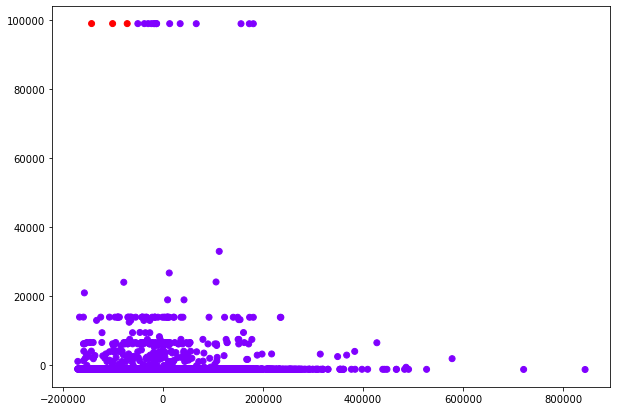

In [ ]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels


# Visualize the predicted training labels versus actual training labels. 
plt.figure(figsize=(10, 7))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=cluster1_fit[:], cmap='rainbow')


###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

In [ ]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
km_model_full = KMeans(n_clusters=2)
km_fit = km_model_full.fit_predict(clustering_df1)

print(km_fit)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train_0 = pairwise_distances(clustering_df1)

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward').fit(pdm_train_0)
cluster.fit_predict(clustering_df1)

### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = pca.fit_transform(clustering_df1)



[1 1 1 ... 1 0 1]


/home/none/anaconda3/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


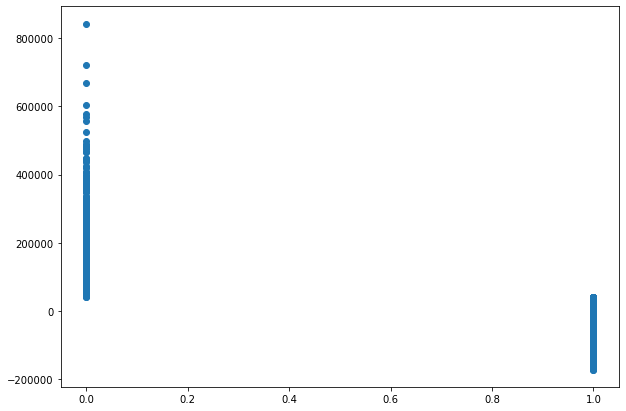

In [ ]:
# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
plt.figure(figsize=(10, 7))
plt.scatter(km_fit,X_pca[:,0], cmap='rainbow')

###################end code for Task 3-a

array([ 1135.27780655, -1038.45065211, -1032.299155  , ...,
       -1032.46185855, -1030.89314079, -1039.76276137])

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [ ]:
###################begin code for Task 3-b



###################end code for Task 3-b

# ***Sources*** : 

 1. [Using numerical and categorical variables together](https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline_column_transformer.html#)
 2.[Simple Agglomerative Clustering of Stocks ](https://www.kaggle.com/code/infanity/simple-agglomerative-clustering-of-stocks/notebook)
 3.[Hierarchical agglomerative clustering](https://www.kaggle.com/code/khotijahs1/hierarchical-agglomerative-clustering)
 4.[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
 

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[35 points] Task 1:</b>  

    [10 points] Task 1-a: Determine “k” value from the elbow method

    [25 points] Task 1-b: Visualization for K-Means Clustering

        [02 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [03 points] Task 1-b-4: Print out a confusion matrix
    


<b>[45 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[15 points] Report :</b> 
Make a 4 min video explaining both the assignment and it's implementation.


 <b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points